In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# Load the CSV file into a DataFrame
data = pd.read_csv("/Users/sushil0711/Downloads/messy_housing_data.csv")
data.head()

,area_sqft,bedrooms,bathrooms,year_built,price,location
0,2696,4.0,1,1962.0,2068779.98,austin
1,2017,6.0,4,2008.0,1539208.46,San Francisco
2,1592,3.0,3,1991.0,557909.7,San Francisco
3,3358,2.0,4,1914.0,NaN,chicago
4,1624,2.0,5,1935.0,716945.96,New York City


In [3]:
# Check number of rows and columns
data.shape

(420, 6)

In [4]:
# Standardize column names and rename important columns for clarity
data.columns = data.columns.str.capitalize()
data.rename(columns = {"Price" : "Price($)",
                    "Year_built" : "Year_built(AD)"}, inplace = True)
data.head()

,Area_sqft,Bedrooms,Bathrooms,Year_built(AD),Price($),Location
0,2696,4.0,1,1962.0,2068779.98,austin
1,2017,6.0,4,2008.0,1539208.46,San Francisco
2,1592,3.0,3,1991.0,557909.7,San Francisco
3,3358,2.0,4,1914.0,NaN,chicago
4,1624,2.0,5,1935.0,716945.96,New York City


In [5]:
# Data overview and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area_sqft       420 non-null    int64  
 1   Bedrooms        399 non-null    float64
 2   Bathrooms       420 non-null    int64  
 3   Year_built(AD)  384 non-null    float64
 4   Price($)        370 non-null    object 
 5   Location        420 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 19.8+ KB


In [6]:
# Check data types of columns 
data.dtypes

Area_sqft           int64
Bedrooms          float64
Bathrooms           int64
Year_built(AD)    float64
Price($)           object
Location           object
dtype: object

In [7]:
# Count and remove duplicate rows
data.duplicated().sum()
data.drop_duplicates(inplace = True)

In [8]:
# Convert Price to numeric, handling errors as NaN
data["Price($)"] = pd.to_numeric(data["Price($)"], errors = "coerce")
data.dtypes

Area_sqft           int64
Bedrooms          float64
Bathrooms           int64
Year_built(AD)    float64
Price($)          float64
Location           object
dtype: object

In [9]:
# Statistical overview of numeric columns
data.describe()

,Area_sqft,Bedrooms,Bathrooms,Year_built(AD),Price($)
count,400.000000,380.000000,400.000000,368.000000,3.440000e+02
mean,2620.532500,3.618421,3.017500,1960.228261,1.371330e+06
std,1329.759422,2.413502,1.455159,37.668887,9.969063e+05
min,-100.000000,1.000000,1.000000,1900.000000,9.640000e+03
25%,1462.500000,2.000000,2.000000,1926.750000,6.535463e+05
50%,2628.000000,3.000000,3.000000,1959.000000,1.179630e+06
75%,3705.750000,5.000000,4.000000,1994.000000,1.878623e+06
max,4999.000000,20.000000,5.000000,2026.000000,8.520000e+06


In [10]:
# Check missing values in data 
data.isnull().sum()

Area_sqft          0
Bedrooms          20
Bathrooms          0
Year_built(AD)    32
Price($)          56
Location           0
dtype: int64

In [11]:
# Filling numeric missing values in data 
data["Bedrooms"].fillna(data["Bedrooms"].median(), inplace = True)
data["Year_built(AD)"].fillna(data["Year_built(AD)"].median(), inplace = True)
data["Price($)"].fillna(data["Price($)"].median(), inplace = True)
data.head() 

,Area_sqft,Bedrooms,Bathrooms,Year_built(AD),Price($),Location
0,2696,4.0,1,1962.0,2068779.98,austin
1,2017,6.0,4,2008.0,1539208.46,San Francisco
2,1592,3.0,3,1991.0,557909.70,San Francisco
3,3358,2.0,4,1914.0,1179629.52,chicago
4,1624,2.0,5,1935.0,716945.96,New York City


In [12]:
# Checking and filling categorical values in data 
data["Location"].isnull().sum()
data["Location"].fillna(data["Location"].mode()[0], inplace = True)

In [13]:
data[["Bedrooms", "Year_built(AD)"]] = data[["Bedrooms", "Year_built(AD)"]].astype(int)
data.head()

,Area_sqft,Bedrooms,Bathrooms,Year_built(AD),Price($),Location
0,2696,4,1,1962,2068779.98,austin
1,2017,6,4,2008,1539208.46,San Francisco
2,1592,3,3,1991,557909.70,San Francisco
3,3358,2,4,1914,1179629.52,chicago
4,1624,2,5,1935,716945.96,New York City


In [14]:
data["Location"].unique()

array(['austin', 'San Francisco', 'chicago', 'New York City', 'Chicago',
       'miami', 'san francisco', 'LA', 'l.a.', 'AUSTIN ', 'Austin',
       'Los Angeles ', 'La ', 'Chicago ', 'SF', 'boston', 'Chicgo', 'nyc',
       'Boston', 'Los Angeles', 'los angeles', 'NYC', 'New York city',
       'NEW YORK CITY', 'LOS ANGELES ', 'Austin ', 'sf', 'San Francisco ',
       'L.A.', 'Miami', 'Bostan', 'Boston ', 'Miami ', 'SAN FRANCISCO',
       'L.A. ', 'Sf ', 'New York City ', 'BOSTON', 'CHICAGO ', 'Nyc ',
       'CHICAGO', 'AUSTIN', 'MIAMI'], dtype=object)

In [15]:
# Standardize and inspect Location values
data["Location"] = data["Location"].str.strip().str.title()
data["Location"].unique()

array(['Austin', 'San Francisco', 'Chicago', 'New York City', 'Miami',
       'La', 'L.A.', 'Los Angeles', 'Sf', 'Boston', 'Chicgo', 'Nyc',
       'Bostan'], dtype=object)

In [16]:
# Standardize city names and preview
data.loc[data["Location"].str.contains("nyc|NYC|Nyc", na = False), "Location"] = "New York City"
data.loc[data["Location"].str.contains("la|La|L.A.", na = False), "Location"] = "Los Angeles"
data.loc[data["Location"].str.contains("Sf|sf", na = False), "Location"] = "San Francisco"
data.loc[data["Location"].str.contains("Bostan", na = False), "Location"] = "Boston"
data.loc[data["Location"].str.contains("Chicgo", na = False), "Location"] = "Chicago"
data.head() 


,Area_sqft,Bedrooms,Bathrooms,Year_built(AD),Price($),Location
0,2696,4,1,1962,2068779.98,Austin
1,2017,6,4,2008,1539208.46,San Francisco
2,1592,3,3,1991,557909.70,San Francisco
3,3358,2,4,1914,1179629.52,Chicago
4,1624,2,5,1935,716945.96,New York City


In [17]:
# Check and remove the outliers from data 
numeric_cols = data.select_dtypes(include = "number").columns
mask = pd.Series(True, index = data.index)
for cols in numeric_cols:
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR 

    mask &= (data[cols] > lower) & (data[cols] < upper)

data = data[mask]
data.shape

(387, 6)

/var/folders/jq/rpx_7rp94yxdcftrl65sdwth0000gn/T/ipykernel_44066/546965785.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[i].boxplot(
/var/folders/jq/rpx_7rp94yxdcftrl65sdwth0000gn/T/ipykernel_44066/546965785.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[i].boxplot(
/var/folders/jq/rpx_7rp94yxdcftrl65sdwth0000gn/T/ipykernel_44066/546965785.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[i].boxplot(
/var/folders/jq/rpx_7rp94yxdcftrl65sdwth0000gn/T/ipykernel_44066/546965785.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9;

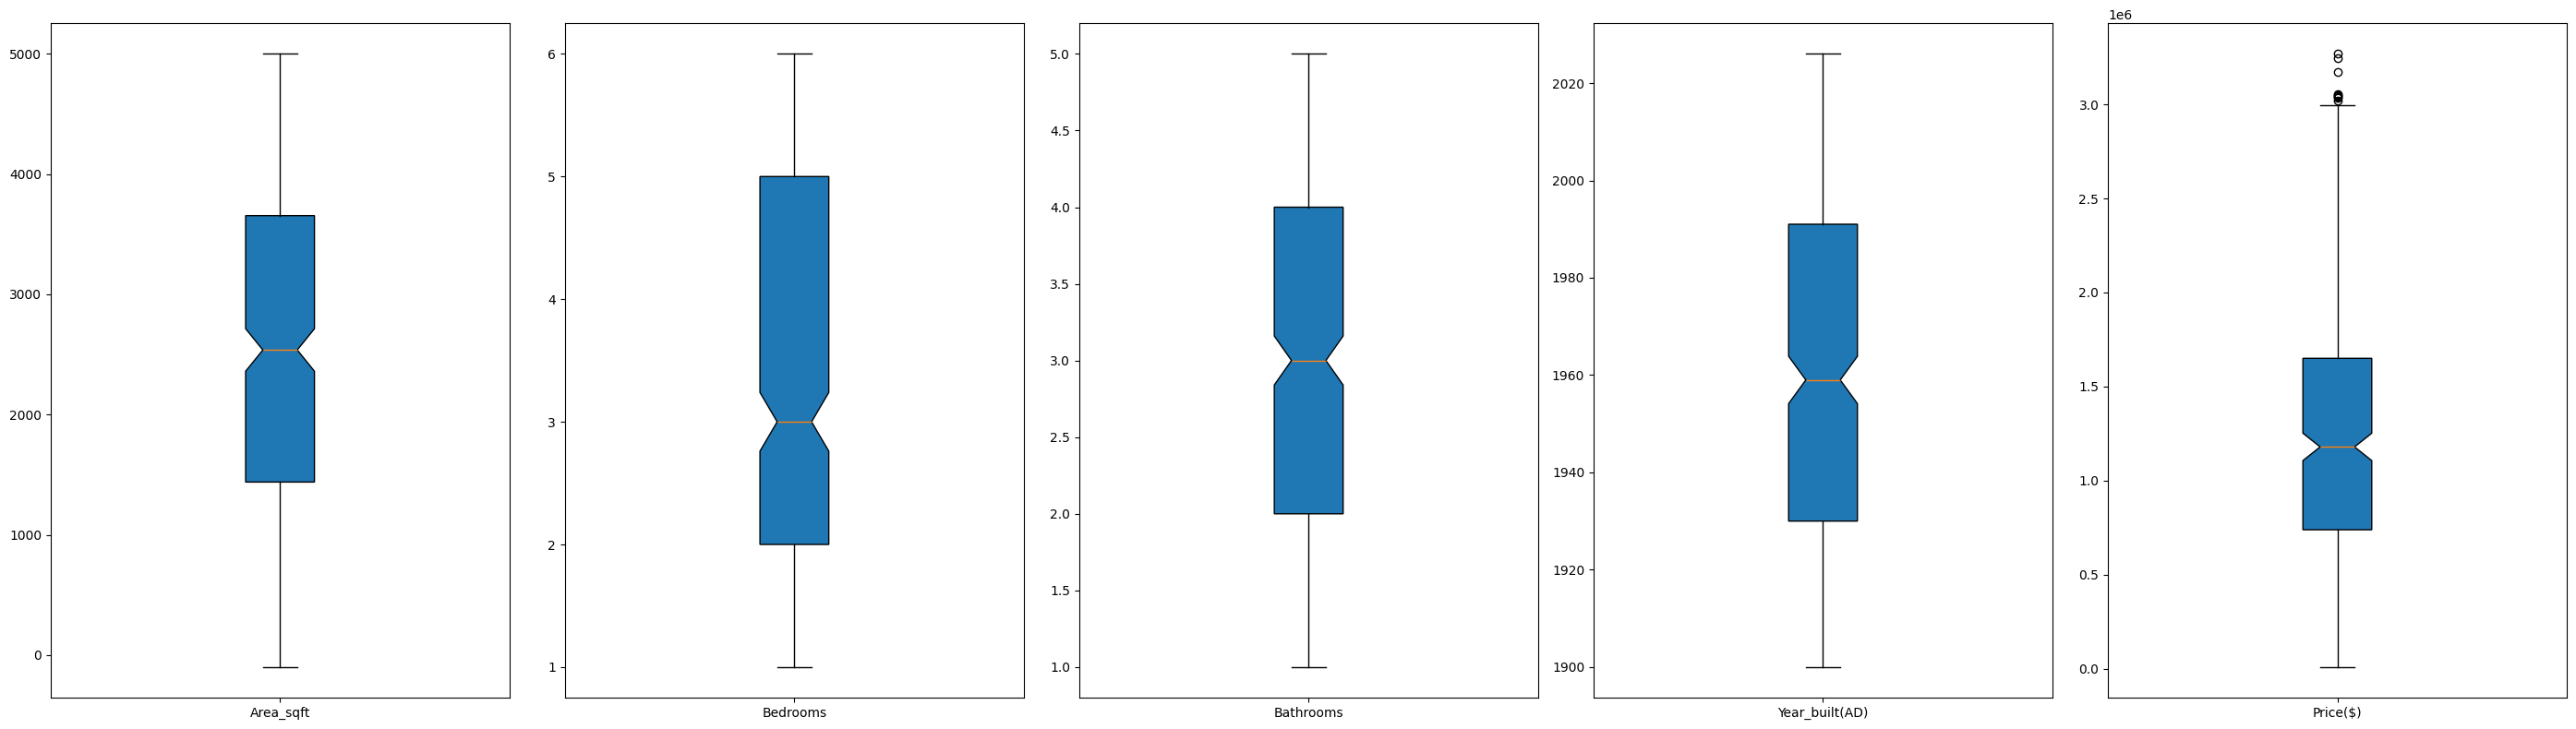

In [18]:
# Visualize distribution and scale of key metrics
fig , ax = plt.subplots(1, 5, figsize = (28, 8))

label = ["Area_sqft", "Bedrooms", "Bathrooms", "Year_built(AD)", "Price($)"]
for i, j in enumerate(label):
    ax[i].boxplot(
        data[j],
        notch = True,
        patch_artist = True,
        labels = [j]
    )
plt.tight_layout()
plt.show()

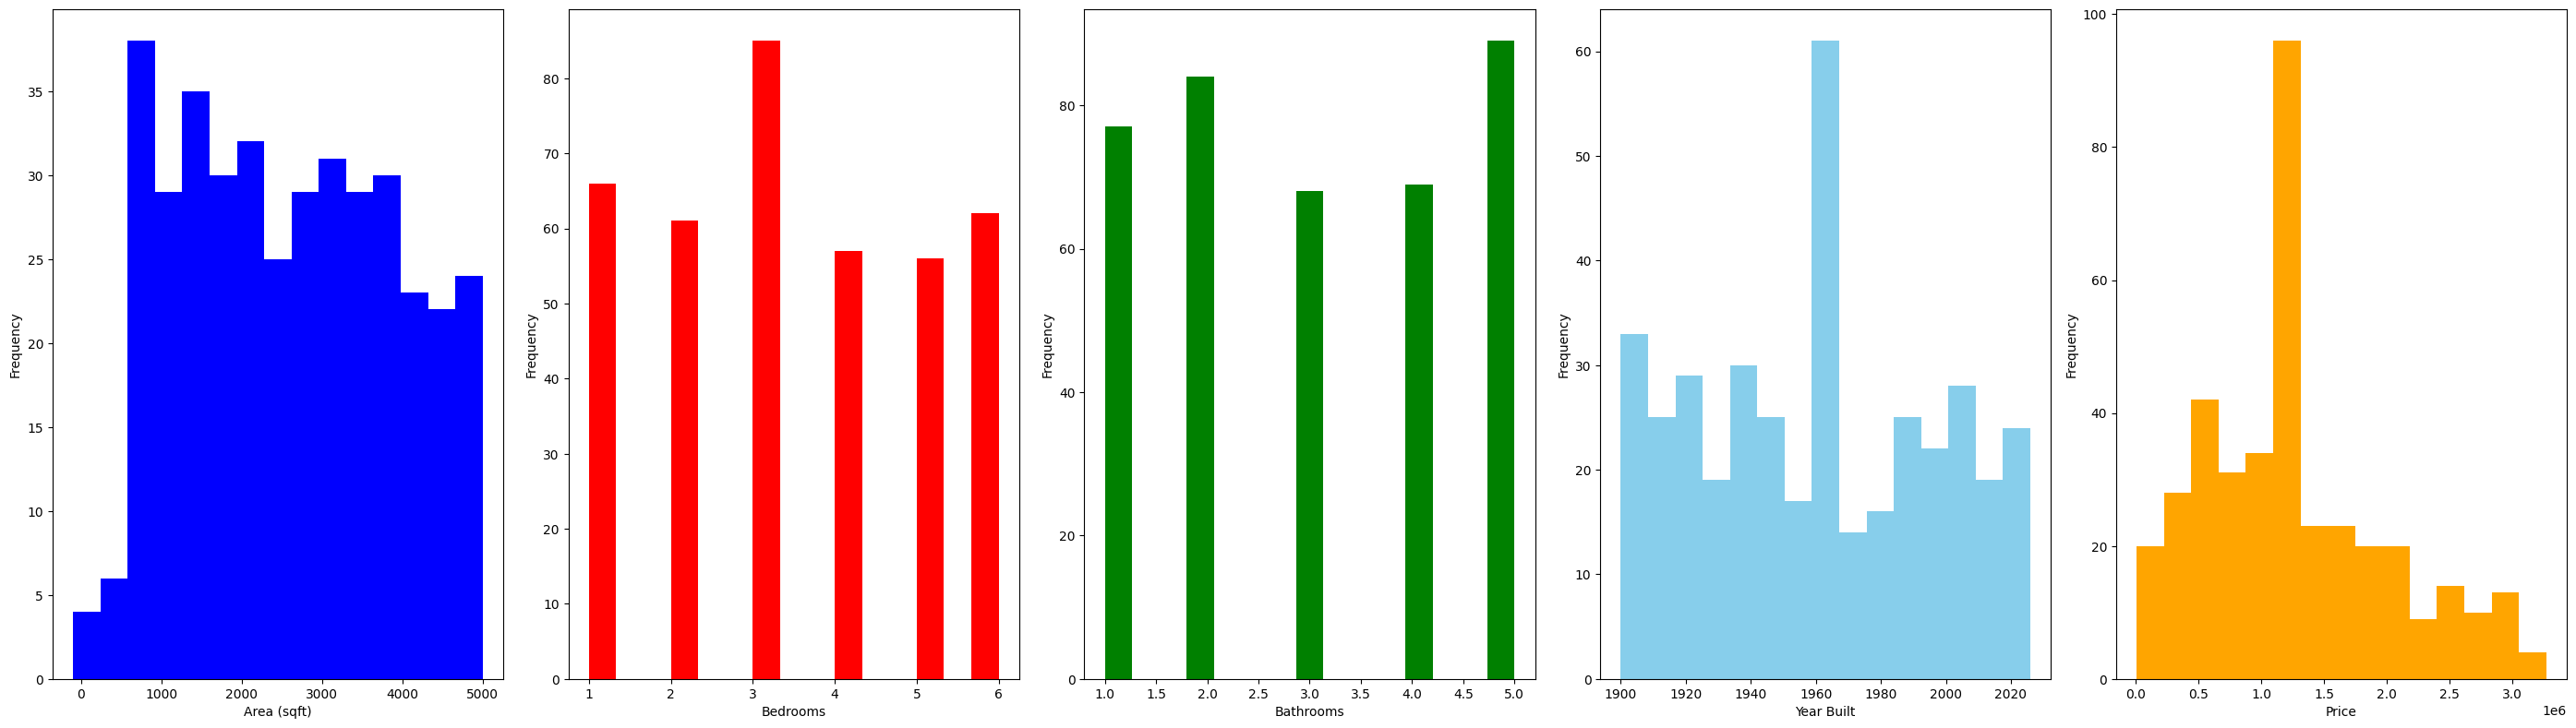

In [19]:
columns = ["Area_sqft", "Bedrooms", "Bathrooms", "Year_built(AD)", "Price($)"]
colors = ["blue", "red", "green", "skyblue", "orange"]
xlabels = ["Area (sqft)", "Bedrooms", "Bathrooms", "Year Built", "Price"]

fig, ax = plt.subplots(1, 5, figsize = (28, 8)) 

for i, j in enumerate(columns):
    ax[i].hist(data[j], bins = 15, color = colors[i])
    ax[i].set_xlabel(xlabels[i])
    ax[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show() 

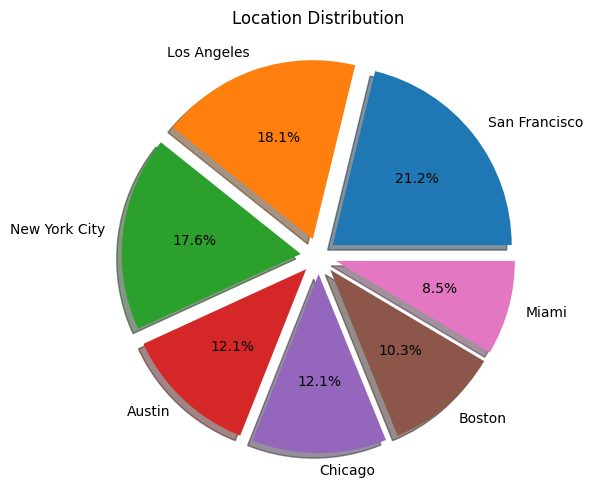

In [20]:
counts = data["Location"].value_counts()
fig, ax = plt.subplots(figsize=(10, 5))

ax.pie(
    counts.values,
    labels = counts.index,
    autopct = "%1.1f%%",
    explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1],
    shadow = True
)
ax.set_title("Location Distribution")
plt.tight_layout()
plt.show()